In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import warnings            
warnings.filterwarnings("ignore")

In [8]:
aerial = pd.read_csv('operations.csv')

** attacking countries **

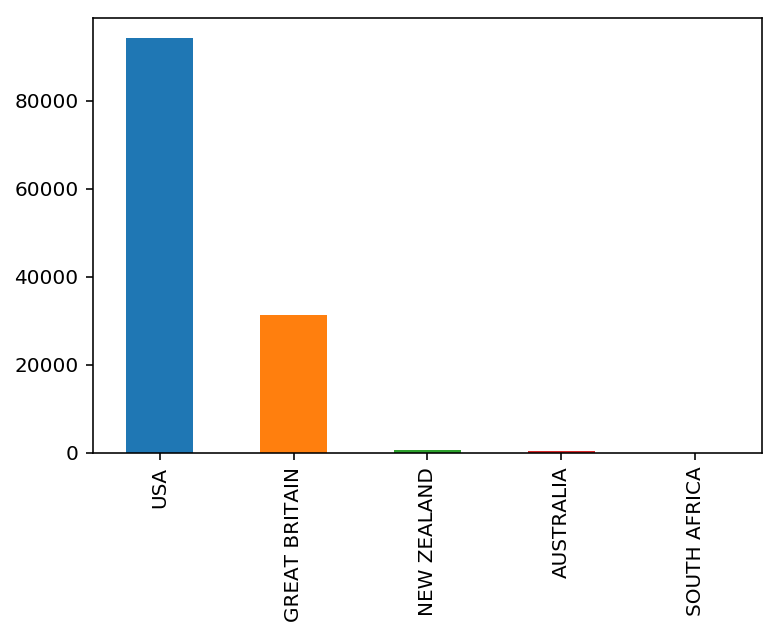

In [9]:
aerial['Country'].value_counts().plot.bar()

** target countries **

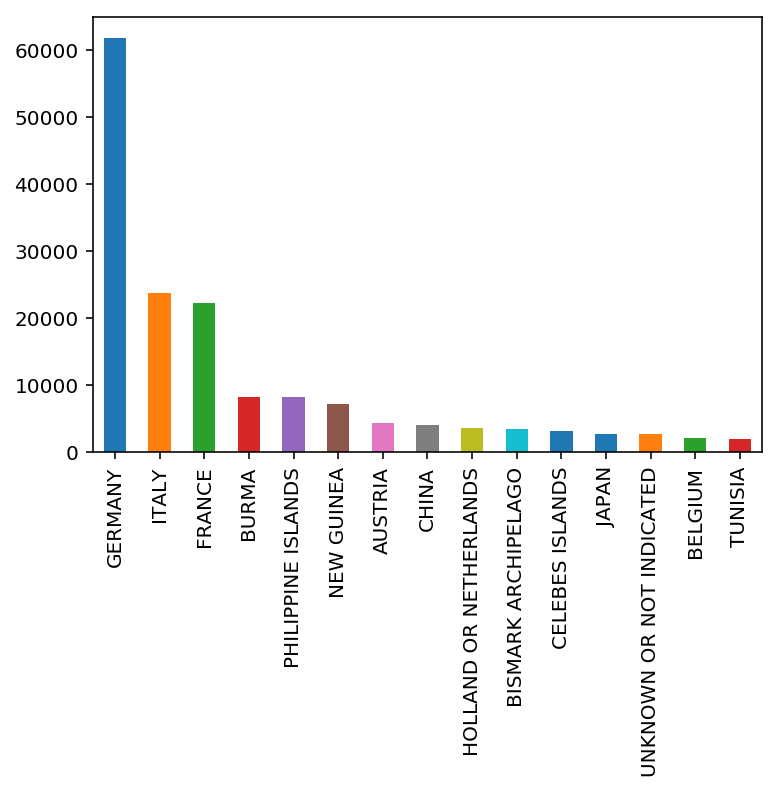

In [10]:
aerial['Target Country'].value_counts()[:15].plot.bar()

** jointly distribution **

In [11]:
top_target = aerial['Target Country'].value_counts()[:15].index.tolist()
aerial_top_tar = aerial[aerial['Target Country'].isin(top_target)]

Text(0.5,1,'Joint distribution of target and attack country')

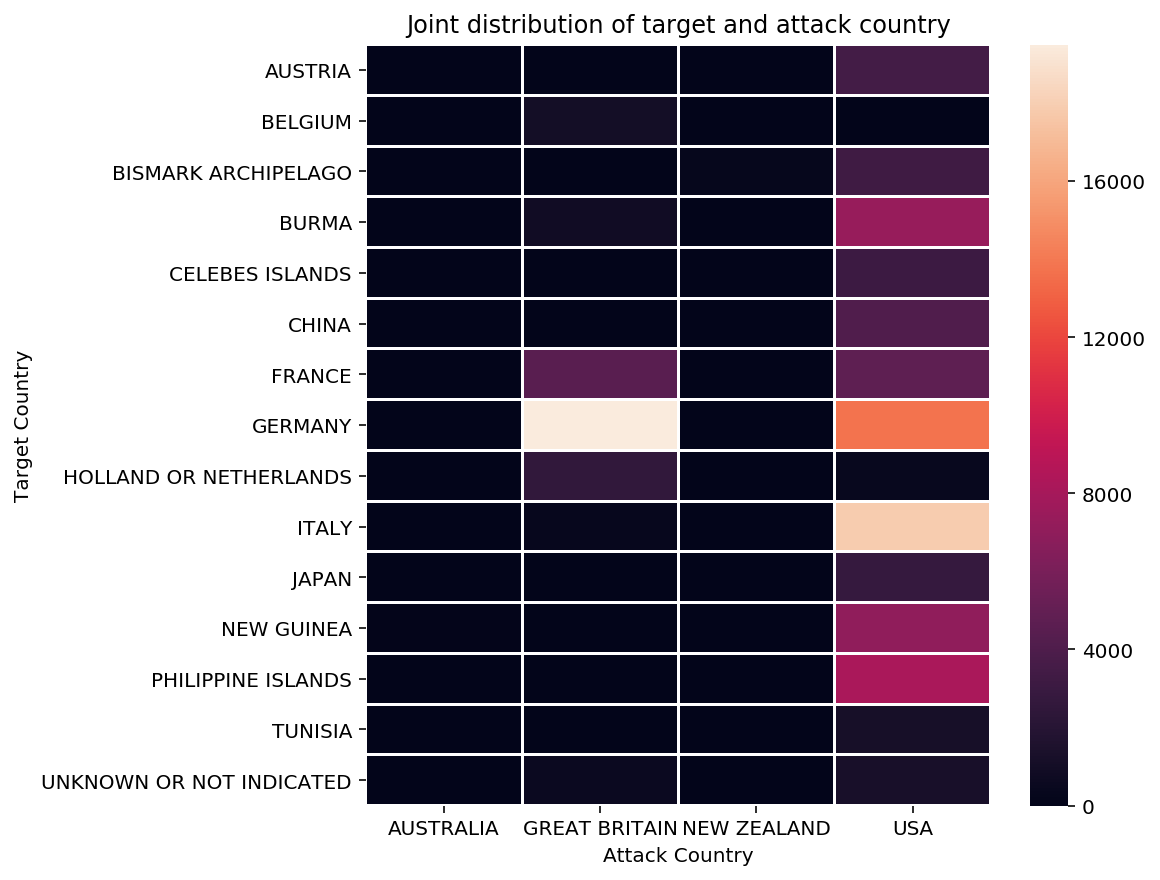

In [12]:
plt.figure(figsize=(7,7))
ax = sns.heatmap(pd.crosstab(aerial_top_tar['Target Country'], aerial_top_tar.Country),
                 lw=1)
ax.set_xlabel('Attack Country')
ax.set_title('Joint distribution of target and attack country')

** Aircraft Series **

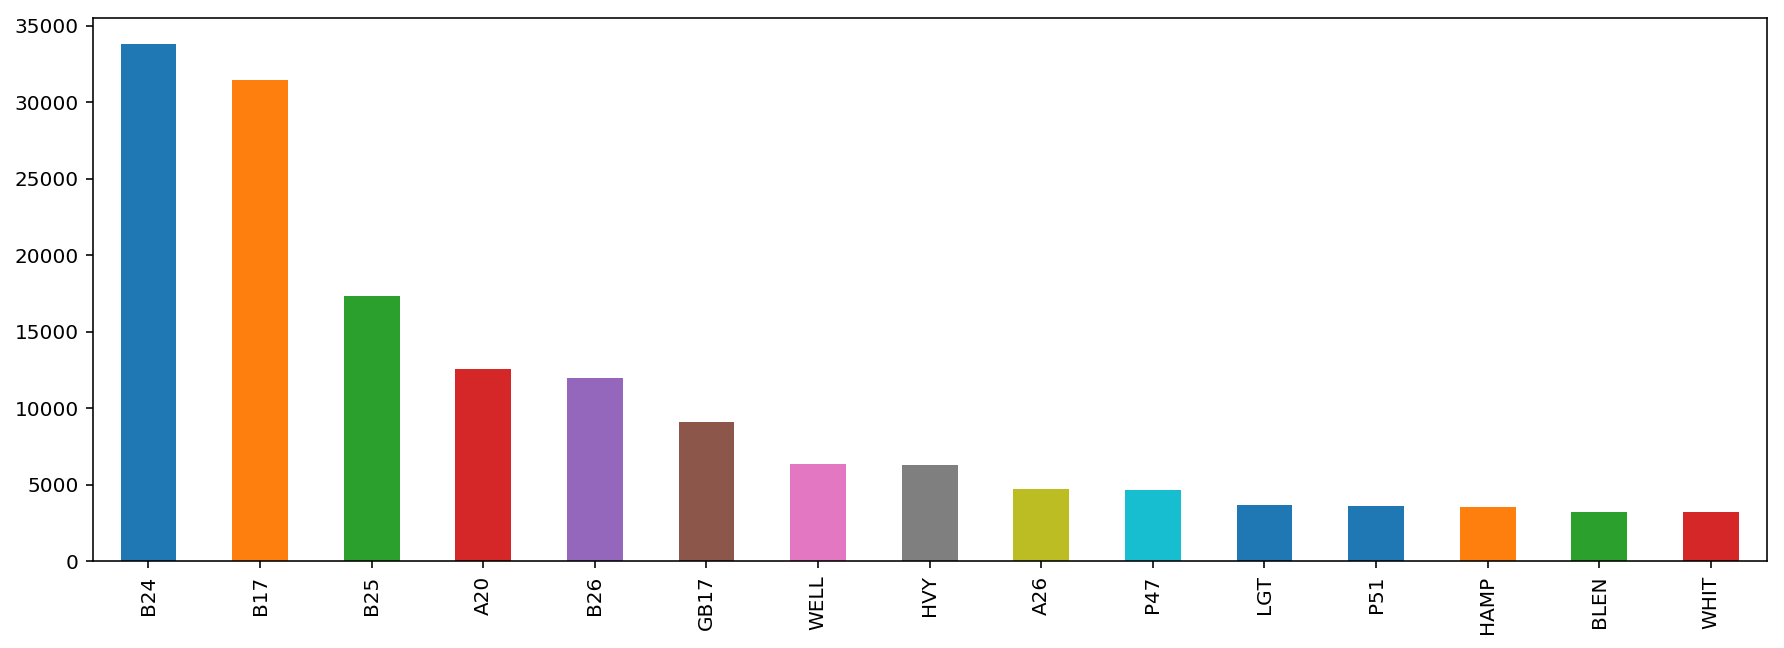

In [13]:
plt.figure(figsize=(15,5))
aerial['Aircraft Series'].value_counts()[:15].plot.bar()

** B-24 **
<img src='images/b-24.jpg' width=500>

why B-24?

In [15]:
top_aircraft = aerial['Aircraft Series'].value_counts()[:15].index.tolist()
aerial_top_aircraft = aerial[aerial['Aircraft Series'].isin(top_aircraft)]

In [16]:
aerial_top_aircraft.groupby('Aircraft Series')['Total Weight (Tons)'].mean().sort_values()

Aircraft Series
BLEN      2.376395
HAMP      2.897517
P51       3.082650
P47       3.199370
WHIT      3.202757
WELL      5.826400
A20       7.699099
A26      10.598149
LGT      10.620418
B25      12.472888
B24      24.734684
GB17     28.922665
B17      30.558671
B26      30.727575
HVY     153.625363
Name: Total Weight (Tons), dtype: float64

** time line **

In [17]:
aerial['Date'] = pd.to_datetime(aerial['Mission Date'], format='%m/%d/%Y')

In [18]:
aerial['Date'].min(), aerial['Date'].max()

(Timestamp('1939-09-03 00:00:00'), Timestamp('1945-12-31 00:00:00'))

In [19]:
aerial_ts = aerial.set_index('Date').sort_index()

In [20]:
monthly_ct = aerial_ts.resample('M')['Mission ID'].count()

Text(0.5,1,'monthly count of bombing mission')

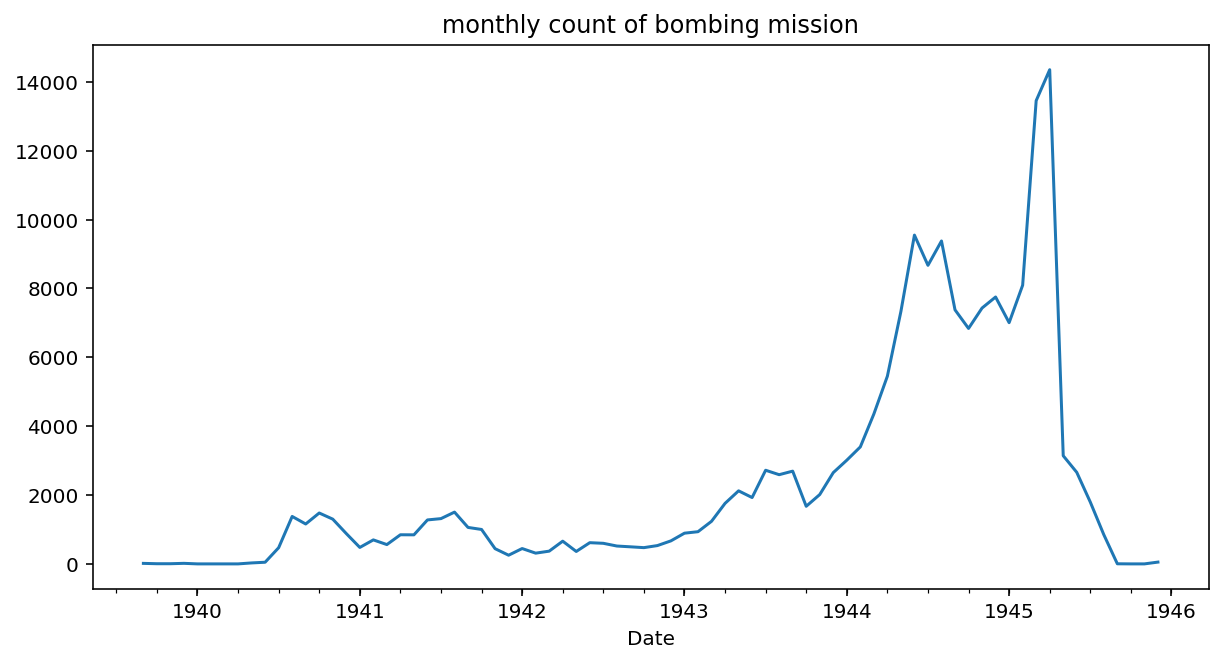

In [21]:
plt.figure(figsize=(10,5))
ax = monthly_ct.plot()
ax.set_title('monthly count of bombing mission')

- ** Note the Spike on D-day! June 6, 1944**

Text(0.5,1,'number of target countries')

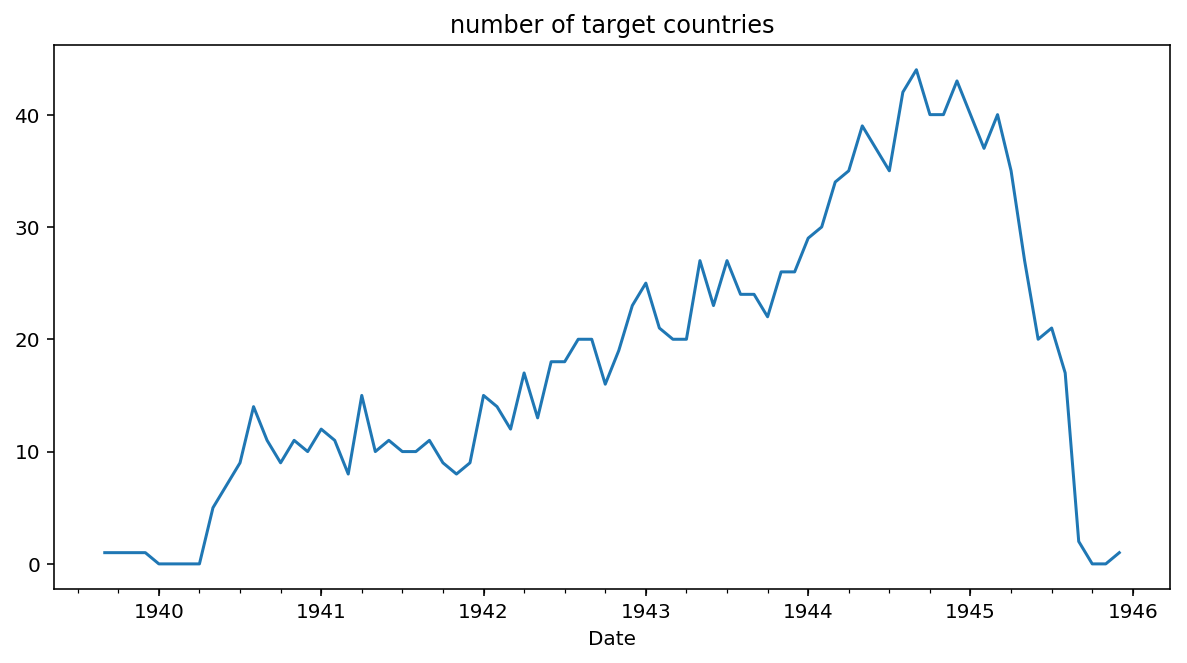

In [22]:
tar_country_ts = aerial_ts.resample('M')['Target Country'].nunique()
plt.figure(figsize=(10,5))
ax = tar_country_ts.plot()
ax.set_title('number of target countries')

** top target countries along time **

In [23]:
aerial['Year'] = aerial['Date'].dt.year

In [24]:
# count for each target country along time
yr_country_ct = aerial.groupby(['Year', 'Target Country'], as_index=False)[['Mission ID']].count().\
                       rename(columns={'Mission ID':'bomb_ct'}).\
                       sort_values(['Year', 'bomb_ct'], ascending=[True, False])
yr_country_ct

,Year,Target Country,bomb_ct
0,1939,GERMANY,41
10,1940,GERMANY,3852
9,1940,FRANCE,1270
13,1940,HOLLAND OR NETHERLANDS,945
3,1940,BELGIUM,396
14,1940,ITALY,116
1,1940,ALBANIA,40
15,1940,LIBYA,30
12,1940,GREECE,19
6,1940,ERITREA,18


In [25]:
# select top 5 target countries for each year
yr_top_tar = yr_country_ct.groupby('Year')[['Year','Target Country', 'bomb_ct']].head(5)
yr_top_tar

,Year,Target Country,bomb_ct
0,1939,GERMANY,41
10,1940,GERMANY,3852
9,1940,FRANCE,1270
13,1940,HOLLAND OR NETHERLANDS,945
3,1940,BELGIUM,396
14,1940,ITALY,116
32,1941,GERMANY,6757
31,1941,FRANCE,1405
35,1941,HOLLAND OR NETHERLANDS,923
22,1941,BELGIUM,376


In [26]:
yr_top_tar_country = yr_top_tar['Target Country'].unique()
yr_top_tar_country.tolist()

['GERMANY',
 'FRANCE',
 'HOLLAND OR NETHERLANDS',
 'BELGIUM',
 'ITALY',
 'LIBYA',
 'NEW GUINEA',
 'BURMA',
 'TUNISIA',
 'PHILIPPINE ISLANDS',
 'JAPAN']

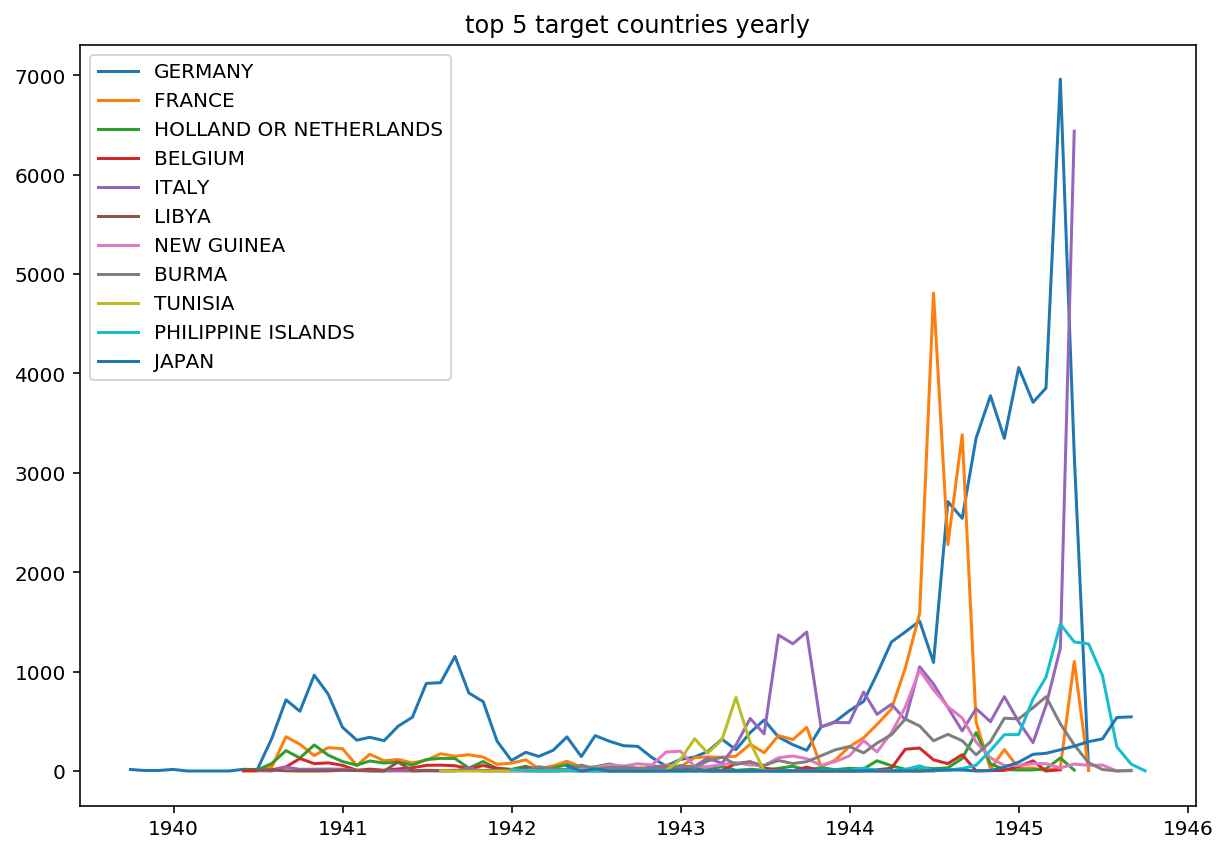

In [27]:
plt.figure(figsize=(10,7))
for n in yr_top_tar_country:
    mask = aerial_ts['Target Country'] == n
    c = aerial_ts[mask].resample('M')['Mission ID'].count()
    plt.plot(c, ls='-', label=n)

plt.title('top 5 target countries yearly')
plt.legend()

- ** Note the Spike on D-day! June 6, 1944 **

** Yearly countplot separated by Theater of Operations **

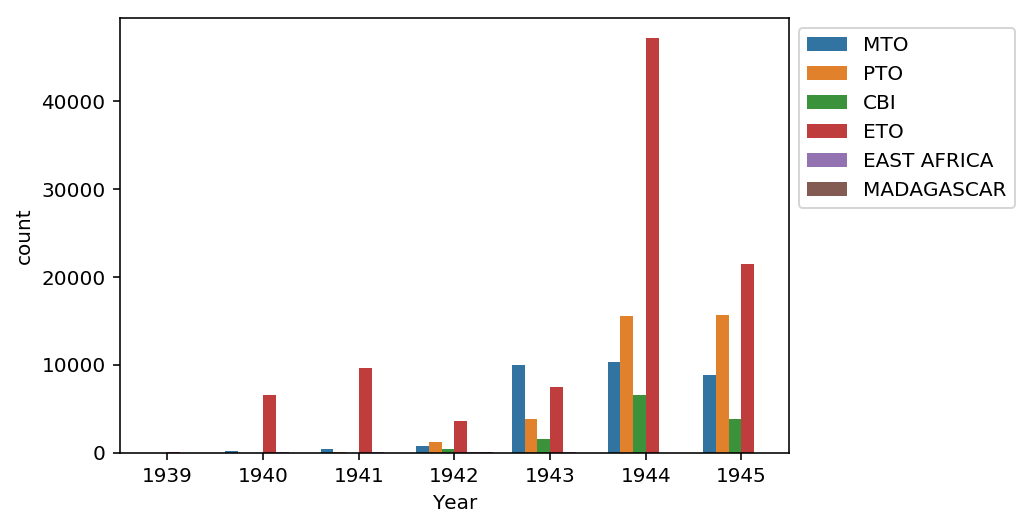

In [50]:
ax = sns.countplot('Year', data=aerial, hue='Theater of Operations')
ax.legend(loc=0, bbox_to_anchor=(1, 1))

** Monthly line plot of Mission Count, separated by Theater of operations **

- ETO: European Theater of Operations
- PTO: Pacific Theater of Operations
- MTO: Mediterranean Theater of Operations
- CBI: China-Burma-India Theater of Operations
- EAST AFRICA: East Africa Theater of Operations

In [75]:
aerial_ts = aerial.set_index('Date').sort_index()

In [76]:
theater = aerial_ts[aerial_ts['Theater of Operations']!='MADAGASCAR'].\
           dropna(subset=['Theater of Operations'])

In [77]:
theater['area'] = theater['Theater of Operations'].map({
                                                        'ETO': 'Euro',
                                                        'PTO': 'Pacific',
                                                        'MTO': 'Mediterranean',
                                                        'CBI': 'Pacific',
                                                        'EAST AFRICA': 'Africa'
})

In [78]:
area = theater['area'].unique()
area

array(['Euro', 'Mediterranean', 'Africa', 'Pacific'], dtype=object)

Text(0.5,1,'Target Area Missions Count')

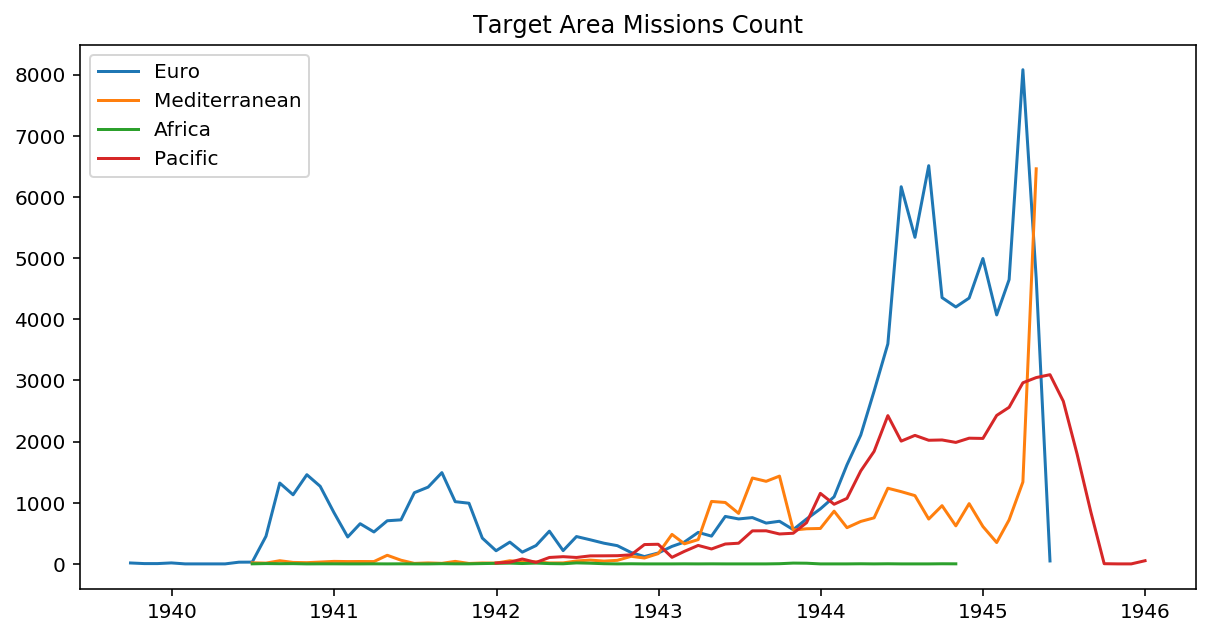

In [80]:
from datetime import datetime

plt.figure(figsize=(10, 5))
for n in area:
    mask = theater['area'] == n
    c = theater[mask].resample('M')['Mission ID'].count()
    plt.plot(c, ls='-', label=n)

plt.legend()
plt.title('Target Area Missions Count')
# plt.annotate('Hitler invades Poland', [datetime(1939, 9, 30), 1000], xytext=[15,15], textcoords='offset points')

<img src='images/TimeLine.jpg' width=500>